<a href="https://colab.research.google.com/github/evgeny-kolonsky/summer_seminar/blob/main/Seminar_parts1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summer seminar. Parts 1-2

Evgeny Kolonsky 2025

v.0.1.1


In [15]:
import numpy as np
from scipy.stats import chi2, poisson, norm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from skimage import io
from sklearn.metrics import r2_score



# 1. Weighted average


$C_1 = 430 \pm 20 \,\textrm{pF}$, $C_2 = 445 \pm 10 \,\textrm{pF}$

In [2]:
import numpy as np
# capacitance, pF, measured by geometrical method
C1, sigma1 = 430, 20
# capacitance, PF, measured by oscilloscope data
C2, sigma2 = 445, 10
# weights
w1, w2 = 1 / sigma1**2, 1 / sigma2**2
# weighted average
C = (w1 * C1 + w2 * C2) / (w1 + w2)
# uncertainty of weighted average
sigma = 1 / np.sqrt(w1 + w2)
print(f'Weighted average C = {C:.0f} +/- {sigma:.0f} pF')


Weighted average C = 442 +/- 9 pF


$C = 442 \pm 9 \,\textrm{pF}$

## Example. Is it parabola?

(cited from "Lab2 Electron in fields experiment")

### Explore data

Trajectory image photo with digitized data points over it.

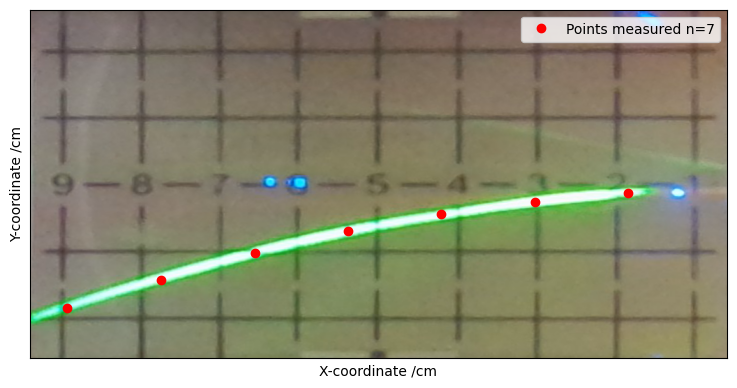

In [3]:
# URL of the image
image_url = 'https://github.com/tphlabs/data/blob/21c585f0f7bb13ff9063ba2728d934fd86560266/Lab2_EF/CollectData/083%20Ua%204.0%20Up%20-2.5%20I%200.000.png?raw=true'
data = '''
# x/cm, y/cm
	9.018	-1.848
	8.616	-1.71
	8.213	-1.566
	7.811	-1.420
	7.409	-1.289
	7.007	-1.158
	6.604	-1.034
	6.202	-0.917
	5.8	-0.806
	5.398	-0.701
	4.996	-0.606
	4.593	-0.52
	4.191	-0.444
	3.789	-0.376
	3.387	-0.315
	2.984	-0.261
	2.582	-0.214
	2.18	-0.171
	1.778	-0.132
	1.376	-0.096
#	0.973	-0.063
'''
X, Y = np.genfromtxt(data.splitlines(), skip_header=1, dtype=float).T
X = np.round(X,2)
Y = np.round(Y,2)

x = X[::3]
y = Y[::3]

# Read the image from the URL
image = io.imread(image_url)

# Display the image
fig, ax = plt.subplots(figsize=(9,6))
plt.imshow(image)

# scale to fit image
xright, xleft = 0.5, 9.5
ytop, ybottom = -2.6, 2.6
x_coord = 1000 - (xright - x) / (xright - xleft) * 1000
y_coord = (y - ybottom) / (ytop - ybottom)*500
scale = np.abs(500 / (ytop - ybottom))



# Plot the data over the image
plt.plot(x_coord, y_coord, 'ro', markersize=6, label=f'Points measured n={x.size}')
plt.legend()

# Add labels and title
plt.xlabel('X-coordinate /cm')
plt.ylabel('Y-coordinate /cm')
#plt.title(r'Trajectory photo for $U_a=4.0 kV$ and $U_p=-2.5 kV$')
ax.set_xticks([])
ax.set_yticks([])


# Show the plot
plt.show()


## Fit paramaters

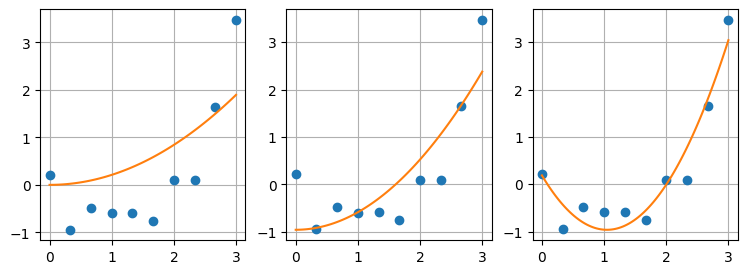

In [4]:
n = 10
x = np.linspace(0,3, n )
xdense = np.linspace(0,3, 100)

signal = (x-1)**2 - 1
noise = np.random.normal(loc=0, scale=.3, size=n)
y = signal + noise

def parabola3(x, a0, a1, a2):
  return a2 * x**2 + a1*x + a0
def parabola2(x, a0,  a2):
  return a2 * x**2 +  a0
def parabola1(x, a2):
  return a2 * x**2

fig, ax = plt.subplots(1,3, figsize=(9,3))

for ix, function in enumerate([parabola1, parabola2, parabola3]):
  ax[ix].plot(x, y,'o')
  popt, _ = curve_fit(function, x, y)
  ydense = function(xdense, *popt)
  ax[ix].plot(xdense, ydense)
  ax[ix].set_xticks(range(0,4))
  ax[ix].set_yticks(range(-1,4))
  ax[ix].grid()

### Test data to be parabola

The trajectory $(x_i, y_i)$ is expected to be parabola $y = ax^2$. We assume the error in $x_i$ to be negligible and the error in $y_i$ to be $\sigma_y = 0.5mm$. Let's test our expectation with chi sqared statistics.

In [16]:
print(' '.join([f'{xi:>5.2f}' for xi in x]))
print(' '.join([f'{yi:>5.2f}' for yi in y]))

 9.02  7.81  6.60  5.40  4.19  2.98  1.78
-1.85 -1.42 -1.03 -0.70 -0.44 -0.26 -0.13


### Code snippet for presentation


In [20]:
# Measured coordinates, cm
points = '''
9.02  7.81  6.60  5.40  4.19  2.98  1.78
-1.85 -1.42 -1.03 -0.70 -0.44 -0.26 -0.13'''
x, y = np.genfromtxt(points.splitlines())

# measurements uncertainty estimated, mm
sigma = 0.5e-1

# parabolic model with one parameter
def parabola(x, a):
  return a*x**2

# fitting the model
parameters, _ = curve_fit(parabola, x, y)
y_expected = parabola(x, *parameters)

chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
DoF = x.size - parameters.size # degrees of freedom
R2 = r2_score(y, y_expected)

print(f'Measurements: {x.size}, Parameters: {parameters.size}, DoF: {DoF}')
print(f'Reduced Chi-squared observed {chi2_observed/DoF:.2f}')
print(f'R2 score: {r2_score(y, y_expected):.4f}')

Measurements: 7, Parameters: 1, DoF: 6
Reduced Chi-squared observed 0.64
R2 score: 0.9960


### calculate statistic for basic case - 7 points, 0.5mm error


Reduced Chi-squared observed 0.64 DoF=6
Probability obtaining Chi-square greater than observed 70%
R2 score: 0.9960


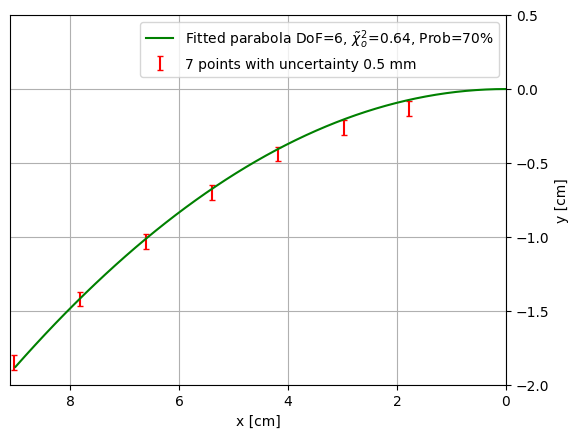

In [6]:
x, y = X[::3], Y[::3]


# measurements uncertainty estimated 0.5 mm
sigma = .5e-1

def parabola(x, a):
  return a*x**2

popt, _ = curve_fit(parabola, x, y)
y_expected = parabola(x, *popt)

chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
DoF = x.size - 1 # degrees of freedom
prob = chi2.sf(chi2_observed, DoF)*100 # Probability percentage

print(f'Reduced Chi-squared observed {chi2_observed/DoF:.2f} {DoF=}')
print(f'Probability obtaining Chi-square greater than observed {prob:.0f}%')
print(f'R2 score: {r2_score(y, y_expected):.4f}')
xdense = np.linspace(0,9)
ydense = parabola(xdense, popt)

plt.errorbar(x, y, sigma, capsize=2, fmt='none', color='red', label=f'{x.size} points with uncertainty {sigma*10:.1f} mm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.plot(xdense, ydense, color='green', label=fr'Fitted parabola {DoF=}, $\tilde\chi_o^2$={chi2_observed/DoF:.2f}, Prob={prob:.0f}%')
plt.legend()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.ylim(-2.0, 0.5)
plt.xlim(9.1, 0.0)
plt.show()

### Take now more points, the same uncertainty




Reduced Chi-squared observed 0.58 DoF=19
Probability obtaining Chi-square greater than observed 93%
R2 score: 0.9954


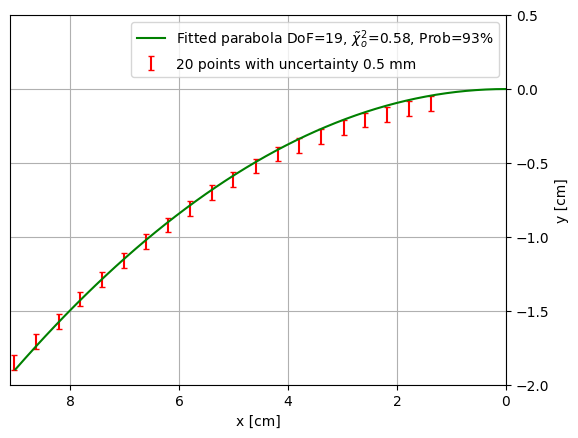

In [7]:
x, y = X[::1], Y[::1]

# measurements uncertainty estimated 0.5 mm
sigma = .5e-1

def parabola(x, a):
  return a*x**2

popt, _ = curve_fit(parabola, x, y)
y_expected = parabola(x, *popt)

chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
DoF = x.size - 1 # degrees of freedom
prob = chi2.sf(chi2_observed, DoF)*100 # Probability percentage

print(f'Reduced Chi-squared observed {chi2_observed/DoF:.2f} {DoF=}')
print(f'Probability obtaining Chi-square greater than observed {prob:.0f}%')
print(f'R2 score: {r2_score(y, y_expected):.4f}')
xdense = np.linspace(0,9)
ydense = parabola(xdense, popt)

plt.errorbar(x, y, sigma, capsize=2, fmt='none', color='red', label=f'{x.size} points with uncertainty {sigma*10:.1f} mm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.plot(xdense, ydense, color='green', label=fr'Fitted parabola {DoF=}, $\tilde\chi_o^2$={chi2_observed/DoF:.2f}, Prob={prob:.0f}%')
plt.legend()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.ylim(-2.0, 0.5)
plt.xlim(9.1, 0.0)
plt.show()


### Again taking 7 points, but suggest the uncertainty be twice less: 0.25mm


Reduced Chi-squared observed 2.54 DoF=6
Probability obtaining Chi-square greater than observed 2%
R2 score: 0.9960


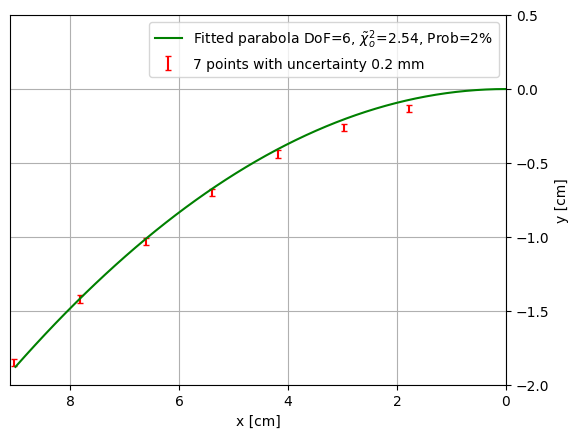

In [8]:
x, y = X[::3], Y[::3]

# measurements uncertainty estimated 0.5 mm
sigma = .25e-1

def parabola(x, a):
  return a*x**2

popt, _ = curve_fit(parabola, x, y)
y_expected = parabola(x, *popt)

chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
DoF = x.size - 1 # degrees of freedom
prob = chi2.sf(chi2_observed, DoF)*100 # Probability percentage

print(f'Reduced Chi-squared observed {chi2_observed/DoF:.2f} {DoF=}')
print(f'Probability obtaining Chi-square greater than observed {prob:.0f}%')
print(f'R2 score: {r2_score(y, y_expected):.4f}')
xdense = np.linspace(0,9)
ydense = parabola(xdense, popt)

plt.errorbar(x, y, sigma, capsize=2, fmt='none', color='red', label=f'{x.size} points with uncertainty {sigma*10:.1f} mm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.plot(xdense, ydense, color='green', label=fr'Fitted parabola {DoF=}, $\tilde\chi_o^2$={chi2_observed/DoF:.2f}, Prob={prob:.0f}%')
plt.legend()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.ylim(-2.0, 0.5)
plt.xlim(9.1, 0.0)
plt.show()


Conclusion: given a measurement uncertainty of $\sigma_y = 0.5 \text{mm}$ we can conclude that the trajectory is likely to be a parabolic form $y=ax^2$.

In [9]:
def metrica(x, y, sigma, fitfunction):
  popt, _ = curve_fit(fitfunction, x, y)
  parameters = popt.size
  y_expected = parabola(x, *popt)

  chi2_observed = np.sum((y - y_expected)**2 / sigma**2)
  DoF = x.size - parameters # degrees of freedom
  chi2_reduced = chi2_observed / DoF # reduced Chi Squared
  prob = chi2.sf(chi2_observed, DoF)*100 # Probability percentage
  return chi2_reduced, DoF, prob

Text(0, 0.5, 'Probability obtaining $\\tilde\\chi^2 > \\tilde\\chi_o^2$')

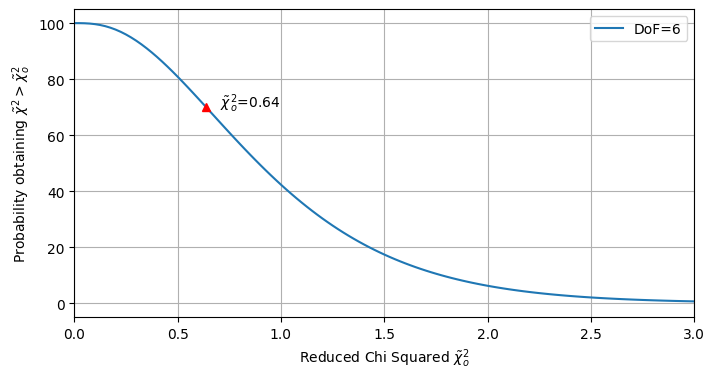

In [10]:
x, y = X[::3], Y[::3]
sigma = 0.5e-1
chi2_reduced, DoF, prob = metrica(x, y, sigma, parabola)
chi2_reduced, DoF, prob

chi2_dense = np.linspace(0, 300,2000)
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(chi2_dense/DoF, chi2.sf(chi2_dense, DoF) * 100, label=f'{DoF=}')
p_value_observed = chi2.sf(chi2_observed*DoF, DoF)
plt.plot(chi2_reduced, prob, 'r^')
pointx, pointy = chi2_reduced, prob
plt.annotate(xy=(pointx, pointy), text=fr'$\tilde\chi_o^2$={chi2_reduced:.2f}', xytext=(pointx+0.07, pointy))

plt.legend()
plt.grid()
plt.xlim(0,3);
plt.xlabel(r'Reduced Chi Squared $\tilde\chi_o^2$')
plt.ylabel(r'Probability obtaining $\tilde\chi^2 > \tilde\chi_o^2$')



Text(0, 0.5, 'Probability ')

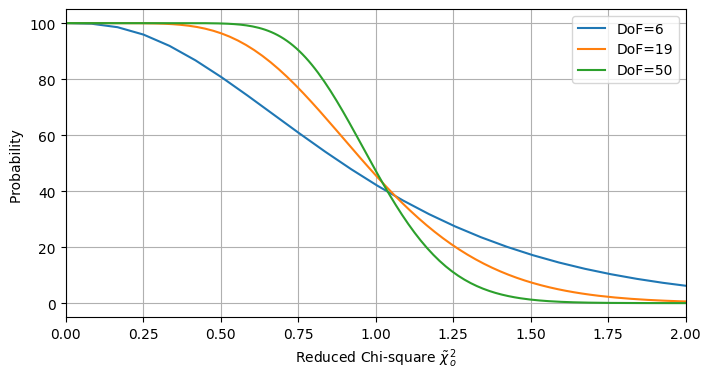

In [11]:
chi2_dense = np.linspace(0, 100,200)
fig, ax = plt.subplots(figsize=(8,4))
for DoF in [6,19, 50]:
  prob = chi2.sf(chi2_dense, DoF) * 100
  plt.plot(chi2_dense/DoF, prob, label=f'{DoF=}')
#  chi2_observed = 0.64
#  p_value_observed = chi2.sf(chi2_observed*DoF, DoF)
#  plt.axvline(chi2_observed, color='gray', ls='--')
#  plt.axhline(p_value_observed, color='gray', ls='--')

plt.legend()
plt.grid()
plt.xlim(0,2);
plt.xlabel(r'Reduced Chi-square $\tilde\chi_o^2$')
plt.ylabel(r'Probability ')




### Play with accuarcy

What if we could measure the error five times more accurate?

basic observation
(DoF=6, sigma=0.5mm) 0.6358036608205273 70.17192203258593
more points 0.5764828478440677 92.54034842268501
more accuracy 2.543214643282109 1.8333122385701557


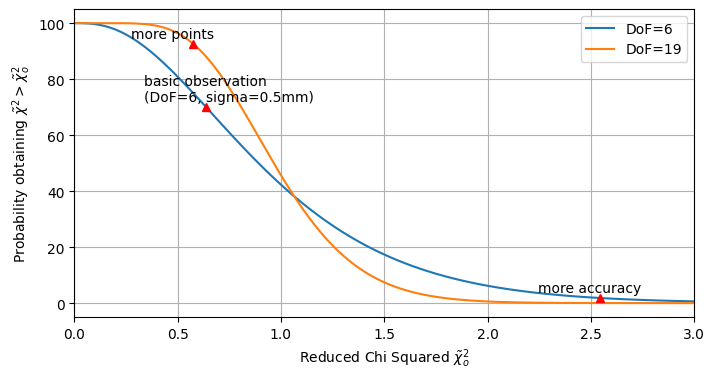

In [12]:
x, y = X[::3], Y[::3]
sigma = 0.5e-1
chi2_reduced, DoF, prob = metrica(x, y, sigma, parabola)
chi2_reduced, DoF, prob

chi2_dense = np.linspace(0, 300,2000)
fig, ax = plt.subplots(figsize=(8,4))

for DoF in [6, 19]:

  prob = chi2.sf(chi2_dense, DoF) * 100
  plt.plot(chi2_dense/DoF, prob, label=f'{DoF=}')
#  chi2_observed = 0.64
#  p_value_observed = chi2.sf(chi2_observed*DoF, DoF)
#  plt.axvline(chi2_observed, color='gray', ls='--')
#  plt.axhline(p_value_observed, color='gray', ls='--')

plt.legend()
plt.grid()
plt.xlim(0,3);
plt.xlabel(r'Reduced Chi Squared $\tilde\chi_o^2$')
plt.ylabel(r'Probability obtaining $\tilde\chi^2 > \tilde\chi_o^2$')

experiments = {}
# basic
x, y, sigma = X[::3], Y[::3], 0.5e-1
chi2_reduced, DoF, prob = metrica(x, y, sigma, parabola)
experiments['basic observation\n(DoF=6, sigma=0.5mm)'] = {'DoF':DoF, 'Chi2r':chi2_reduced, 'prob':prob}
# more measurements
x, y, sigma = X[::1], Y[::1], 0.5e-1
chi2_reduced, DoF, prob = metrica(x, y, sigma, parabola)
experiments['more points'] = {'DoF':DoF, 'Chi2r':chi2_reduced, 'prob':prob}
# less uncertainty
x, y, sigma = X[::3], Y[::3], 0.25e-1
chi2_reduced, DoF, prob = metrica(x, y, sigma, parabola)
experiments['more accuracy'] = {'DoF':DoF, 'Chi2r':chi2_reduced, 'prob':prob}

for key in experiments:
  experiment = experiments[key]
  pointx, pointy = (experiment['Chi2r'], experiment['prob'])
  print(key, pointx, pointy)
  plt.plot(pointx, pointy, '^', color='red')
  plt.annotate(xy=(pointx, pointy), text=key, xytext=(pointx-0.3, pointy+2))

Conclusion: with a smaller uncertainty of $\sigma_y = 0.1 \text{mm}$ the reduced chi squared is too large, and we have to reject the hypothesis that the trajectory follows a parabolic form $y=ax^2$.

In [13]:
from sklearn.metrics import r2_score

# Assuming y and y_expected are already defined from the curve fitting
r2 = r2_score(y, y_expected)
print(f'R2 score: {r2:.4f}')

R2 score: 0.9960


In [14]:
# Calculate R2 score manually
# R2 = 1 - (SS_res / SS_tot)
# SS_res = sum of squares of the residuals
# SS_tot = total sum of squares

y_mean = np.mean(y)
ss_res = np.sum((y - y_expected)**2)
ss_tot = np.sum((y - y_mean)**2)

r2_manual = 1 - (ss_res / ss_tot)
print(f'R2 score (manual): {r2_manual:.4f}')

R2 score (manual): 0.9960
